<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/Lottery2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
#@title Imports { display-mode: "form" }
import jax 
import jax.numpy as jnp
import matplotlib.pyplot as plt 

import matplotlib as mpl
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [37]:
initial_wealth = 100 

def utility_fn(x):
  return jnp.sqrt(x)

def value(utility_fn):
  samples = jax.random.choice(jax.random.PRNGKey(0), jnp.array([225.0, 0.0]), shape=(10000,))
  utils = jax.vmap(utility_fn)(samples)
  return jnp.mean(utils)

In [38]:
print(f"Expected Value: {value(lambda x: x)}")

Expected Value: 111.89249420166016


In [39]:
print(f"Expected Utility: {value(utility_fn)}")

Expected Utility: 7.459499835968018


In [40]:
gamble_results = []
no_gamble_results = []
alphas = jnp.linspace(0.1, 0.9, 20)
for alpha in alphas:
  v = value(lambda x: x**alpha)
  gamble_results.append(v)
  no_gamble_results.append(initial_wealth**alpha)

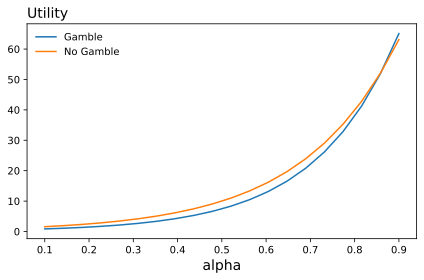

In [42]:
fig = plt.figure(dpi=300, tight_layout=True)
plt.plot(alphas, gamble_results, label='Gamble')
plt.plot(alphas, no_gamble_results, label='No Gamble')
plt.title('Utility', loc='left', size=14)
plt.xlabel('alpha', size=14)
plt.legend(frameon=False)
fig.savefig('utility_gamble.png', format='png')
plt.show()